#Divorce Predictor

In [1]:
##Importing relevant libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
##Storing data in data frame
df = pd.read_excel("divorce.xlsx")

In [3]:
##Checking information of different parameters. Also, checking for null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [5]:
##Having a look at the dataset.
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [42]:
conditions = [(df['Class'] == 0),
              (df['Class'] == 1),]
values = ["Not Divorced","Divorced"]
df["Result"] = np.select(conditions, values)

In [34]:
df_wo_target = df.iloc[:,0:54]
target = df["Class"]
df_wo_target.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0


In [31]:
##Checking for correlation between different parameters
df_wo_target.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,0.892253,0.794307,0.842996,0.817099,0.848754,0.831822,0.895970,0.853739,0.900446,0.840966,0.815708,0.785280,0.822534,0.813233,0.822084,0.803507,0.829037,0.762102,0.858139,0.792257,0.699223,0.739679,0.799735,0.749774,0.796413,0.812867,0.786890,0.804129,0.817035,0.838355,0.804182,0.642307,0.482223,0.752972,0.510160,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,0.823380,0.862835,0.791073,0.875800,0.801316,0.806497,0.822317,0.883856,0.829422,0.884176,0.790468,0.795406,0.773018,0.868240,0.769244,0.861421,0.817364,0.776943,0.789827,0.844007,0.661210,0.735763,0.757286,0.714360,0.753566,0.781295,0.747088,0.751705,0.787768,0.788200,0.780757,0.648539,0.503894,0.699765,0.489062,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,0.805915,0.780258,0.758969,0.750602,0.806909,0.775528,0.808161,0.797395,0.798999,0.807892,0.796069,0.727933,0.706585,0.740476,0.724506,0.728653,0.797595,0.689914,0.755491,0.752391,0.652188,0.747669,0.726481,0.702500,0.730290,0.744390,0.736984,0.740642,0.759820,0.781657,0.739967,0.569293,0.385152,0.661830,0.427409,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,0.808533,0.793992,0.751623,0.757000,0.794184,0.878416,0.809968,0.835296,0.832750,0.815896,0.775132,0.839534,0.744783,0.776640,0.736228,0.762765,0.767206,0.827847,0.781792,0.772562,0.661251,0.746677,0.764381,0.729022,0.770813,0.794636,0.760451,0.790350,0.763502,0.798520,0.768706,0.639671,0.452479,0.707212,0.446798,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,0.936955,0.846513,0.915033,0.845576,0.879461,0.853561,0.947429,0.894474,0.943349,0.892909,0.871994,0.840265,0.888584,0.833608,0.888740,0.836194,0.883768,0.809789,0.925601,0.837501,0.785038,0.832032,0.879037,0.827560,0.878289,0.887498,0.859581,0.852601,0.866293,0.871809,0.864434,0.737922,0.613142,0.799453,0.591656,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,0.340135,0.209801,0.305109,0.224459,0.323787,0.311056,0.377330,0.251856,0.365227,0.230486,0.273564,0.220010,0.246478,0.191458,0.291159,0.200634,0.283895,0.254858,0.309302,0.266464,0.247634,0.316605,0.292037,0.279789,0.276539,0.287708,0.281458,0.297791,0.296121,0.351433,0.329765,0.227993,0.171599,0.339918,0.094820,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,0.432479,0.511761,0.373361,0.491021,0.494110,0.573290,0.461450,0.544550,0.469995,0.544207,0.409827,0.378915,0.254912,0.446469,0.288867,0.443149,0.444643,0.351262,0.349379,0.448569,0.334308,0.442306,0.395764,0.328700,0.349076,0.370158,0.431979,0.401769,0.477063,0.501758,0.445483,0.333211,0.149930,0.425874,0.199548,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,0.889795,0.890338,0.840350,0.888822,0.873804,0.865680,0.881005,0.941084,0.873546,0.922465,0.861939,0.857010,0.845731,0.896841,0.809110,0.883414,0.848766

In [40]:
#from scipy.stats import chi2_contingency
#chi2_contingency(pd.crosstab(df_wo_target.Atr1 df_wo_target.Atr2))

In [46]:
Class = df.Class.value_counts() 
Class

0    86
1    84
Name: Class, dtype: int64

As We can see that we have balanced data set.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_wo_target, target,random_state = 42,test_size=0.3)

In [37]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [39]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9803921568627451


In [43]:
print(classification_report(y_test, y_pred, target_names=df.Result.unique()))

              precision    recall  f1-score   support

    Divorced       0.96      1.00      0.98        25
Not Divorced       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



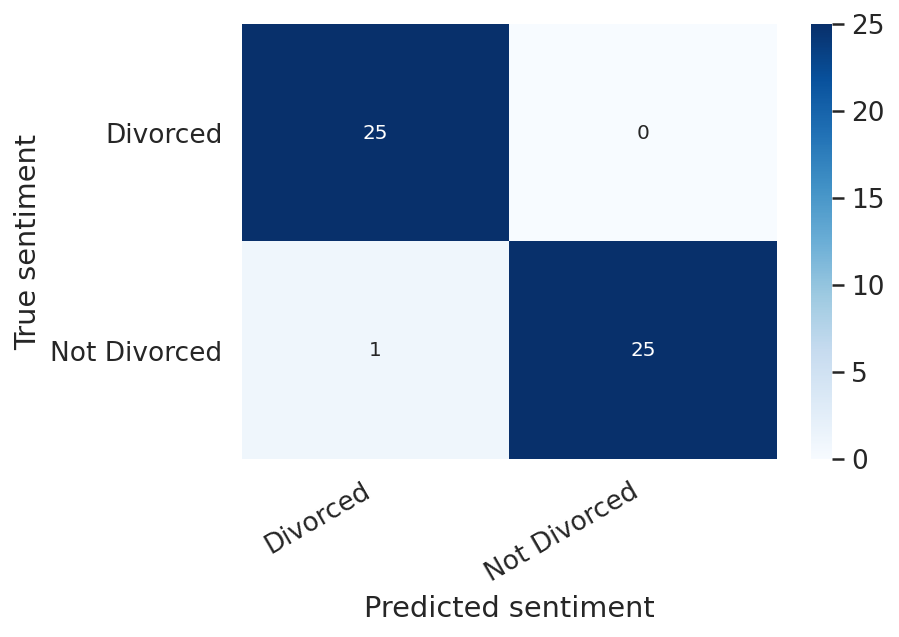

In [45]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=df.Result.unique(), columns=df.Result.unique())
show_confusion_matrix(df_cm)